# Predictive maintenance Model for a Delivery Company - Classificationt.

<img src="https://miro.medium.com/v2/resize:fit:1023/0*iP4Vf0LKZDKDAPjq.jpg">


* Bu data da verilerimiz imbalanced yani oldukça dengesiz, bu dmek oluyor ki bazı sınıfların verisi diğerinden az, makine öğrenmesinde bu istenmeyen bir durum,  bunu için SMOTE yöntemi kullanacağız yani (Synthetic Minority Over-sampling Technique), az olan sınıflar için sentetik dataüretip veri dengesizliğini aşacağız. over sampling veya undersampling.  Veriyi dengeledikten sonra model geliştirme ve diğer işlemleri yapabiliriz, bunun için from imblearn.over_sampling import SMOTE paketini kullanacağız.

## Project Overview
- The goal of this project is to build a classification model that can accurately predict the target variable.
- The dataset used in this project has an imbalanced class distribution, which can negatively impact the model's performance.
- To address this issue, the SMOTE algorithm is used to generate synthetic samples of the minority class, effectively balancing the class distribution.
- After applying SMOTE, various classification algorithms are tested, and the best-performing model is selected.
- The project includes data preprocessing, model training, evaluation, and deployment steps.

## Key Features
- Use of SMOTE to handle class imbalance in the dataset
- Comparison of multiple classification algorithms
- Evaluation of model performance using appropriate metrics
- Jupyter Notebook for easy code exploration and reproduction

## How to Use
1. Clone the repository to your local machine.
2. Install the required dependencies (e.g., numpy, pandas, sklearn, imblearn).
3. Open the Jupyter Notebook file and follow the instructions to run the code.
4. Explore the dataset, experiment with different classification models, and evaluate their performance.

## Contributions
Contributions to this project are welcome. If you find any issues or have suggestions for improvements, please feel free to create a new issue or submit a pull request.


In [1]:
#!pip install imbalanced-learn

In [2]:
#!pip install scikit-learn

In [3]:
import pandas as pd
pd.set_option('display.max_columns',55)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

* Bu, bir cihaz veya sistem arıza verilerini içeren bir veri seti. 

* Veriler aşağıdaki özelliklerden oluşuyor:

*date: Cihaz arızasının gerçekleştiği tarih.
    
*device: Arızalanan cihazın kimliği.

*failure: Arıza durumu (0 = arıza yok, 1 = arıza var).

*attribute1 - attribute9: Cihazın çeşitli performans ölçümleri.

In [4]:
df=pd.read_csv('failure.csv')

In [5]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
df.shape

(124494, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [9]:
# Datanın dengesizliğini burada görebiliriz

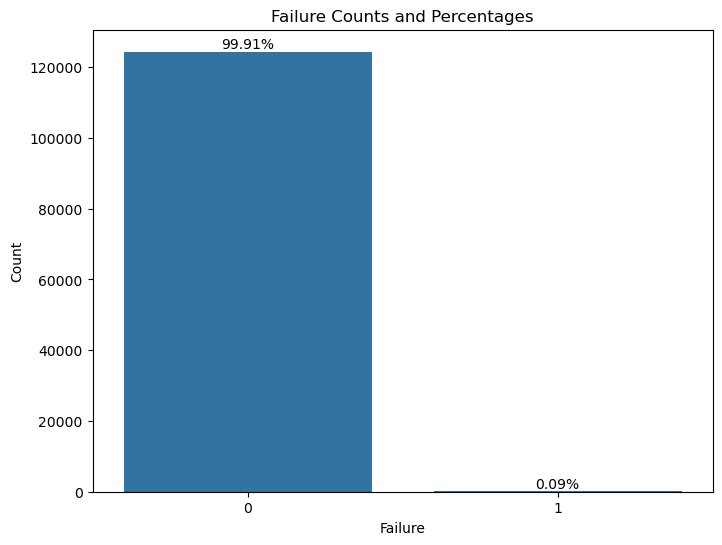

In [10]:
plt.figure(figsize=(8, 6))
value_counts = df['failure'].value_counts()
value_percentages = (value_counts / len(df)) * 100
sns.countplot(x=df['failure'])
# Her bir kategorinin yüzde oranını gösterme
for i, p in enumerate(value_percentages):
    plt.text(i, value_counts[i], f"{p:.2f}%", ha='center', va='bottom')
plt.title('Failure Counts and Percentages')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()

In [11]:
df.shape

(124494, 12)

In [12]:
df['failure'].value_counts(normalize=True)

failure
0    0.999149
1    0.000851
Name: proportion, dtype: float64

In [13]:
del df['date']
# date sutununu sildim, aslında datetime yapmıştım ama silmeye kakrar verdim

In [14]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [15]:
df['device'] = df['device'].str.replace(r'[a-zA-Z]', '', regex=True).astype(str)
# device sutunundaki harflei kaldırdım

* Imbalanced datada balance yapmadan önce de modelleme yapılır, daha sonra balance yapılıp tekrar modellenir ve kıyaslama yapılır.

In [16]:
x=df.drop('failure',axis=1)
y=df['failure']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [18]:
G=GaussianNB()
B=BernoulliNB()

In [19]:
G.fit(x_train,y_train)

GaussianNB()

In [20]:
Gtahmin=G.predict(x_test)

In [21]:
accuracy_score(Gtahmin,y_test)

0.9891561910116872

In [22]:
d=DecisionTreeClassifier()

In [23]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dtahmin=d.predict(x_test)

In [25]:
accuracy_score(dtahmin,y_test)

0.9987148078236073

# OVERSAMPLING & UNDERSAMPLING

<img src='https://miro.medium.com/v2/resize:fit:725/1*7xf9e1EaoK5n05izIFBouA.png'>

In [26]:
from collections import Counter
over = SMOTE()
x, y = over.fit_resample(x, y)
labels = Counter(y)
print("y labels after oversampling")
print(labels)

y labels after oversampling
Counter({0: 124388, 1: 124388})


<Axes: xlabel='failure', ylabel='count'>

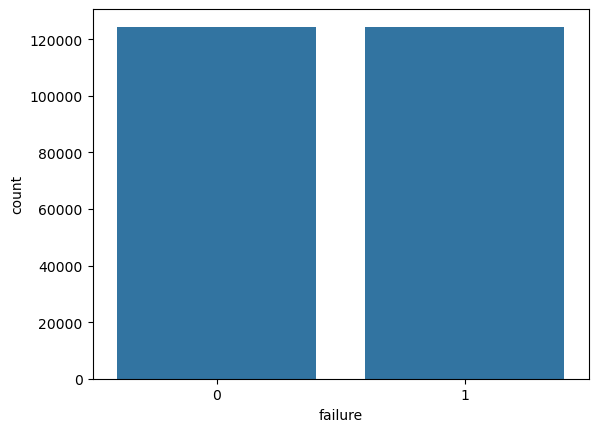

In [27]:
sns.countplot(x=y)
# artık y dengelendi.

In [28]:
df_resampled = pd.DataFrame(x, columns=x.columns)
df_resampled['failure'] = y

In [29]:
# balanced verinin birkaç satırını görelim
df_resampled.head()

,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,101085.0,215630672,56,0,52,6,407438,0,0,7,0
1,10166.0,61370680,0,3,0,6,403174,0,0,0,0
2,1016.0,173295968,0,0,0,12,237394,0,0,0,0
3,1010.0,79694024,0,0,0,6,410186,0,0,0,0
4,1012.0,135970480,0,0,0,15,313173,0,0,3,0


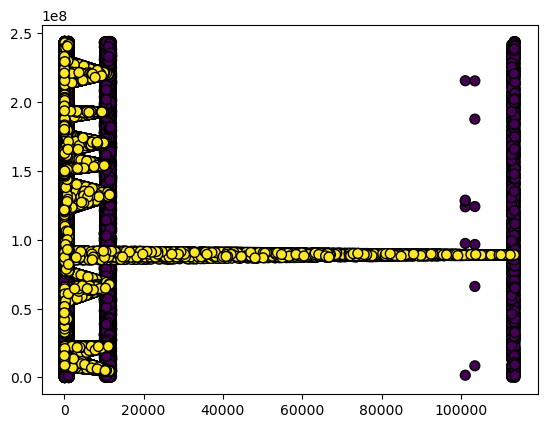

In [31]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], marker="o", c=y, s=50, edgecolor="k")
#Bu kodum çalışmadı, keike çalışsaydı ,daha güzel bir grafik olacaktı

## Modelleme

In [32]:
x=df_resampled.drop('failure',axis=1)
y=df_resampled[['failure']]

In [33]:
#x=pd.get_dummies(x,drop_first=True)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [35]:
G=GaussianNB()
B=BernoulliNB()

In [36]:
G.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [37]:
Gtahmin=G.predict(x_test)

In [38]:
accuracy_score(Gtahmin,y_test)

0.5808746683817028

In [39]:
d=DecisionTreeClassifier()

In [40]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
dtahmin=d.predict(x_test)

In [42]:
accuracy_score(dtahmin,y_test)

0.9984323498673526

In [43]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24724
           1       1.00      1.00      1.00     25032

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756



In [44]:
confusion_matrix(dtahmin,y_test)

array([[24699,    25],
       [   53, 24979]], dtype=int64)

<Axes: >

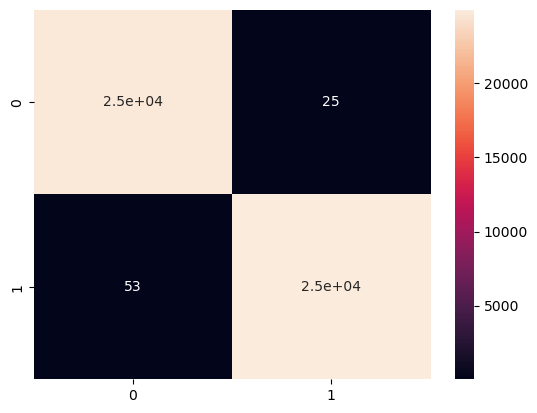

In [45]:
sns.heatmap(confusion_matrix(dtahmin,y_test),annot=True)

* model örneklerin %99 unu doğru tahmin etti ve başarılı oldu, data imbalanced iken yaptığım modellemede her iki model de yüksek başarı göstermişti smote den sonra DT yüksek başarı gösterdi, GB %55 te kaldı.